<a href="https://colab.research.google.com/github/enosung/ubion/blob/main/%EC%96%B4%EB%A0%B5%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2023 3차시 팀과제
#서울자전거데이터 머신러닝

#Y(종속변수): 빌린 자전거 개수
#X(독립변수) : 습도
#X(통제변수) : 온도 , 풍속

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import genfromtxt
#서울시자전거데이터 마운트트
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion 파일/SeoulBikeData.csv", encoding = "cp949")
df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#칼럼 열 삭제제
df1 = df.drop(['Date','Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)'], axis = 1)
       

In [ ]:
df1.info()
#  RangeIndex: 8760 = non-null 8760  null값은 없어보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(캜)     8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Seasons            8760 non-null   object 
 6   Holiday            8760 non-null   object 
 7   Functioning Day    8760 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 547.6+ KB


In [ ]:
#변수 rename 
df1.rename(columns={'Rented Bike Count': '빌린 자전거 갯수', 'Temperature(캜)': '온도', 'Humidity(%)':'습도'
                    ,'Wind speed (m/s)': '풍속','Seasons':'계절','Hour':'시간','Holiday':'휴무'},inplace=True)

In [ ]:
df1.head()

,빌린 자전거 갯수,시간,온도,습도,풍속,계절,휴무,Functioning Day
0,254,0,-5.2,37,2.2,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,Winter,No Holiday,Yes


In [ ]:
df1.describe()

,빌린 자전거 갯수,시간,온도,습도,풍속
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909
std,644.997468,6.922582,11.944825,20.362413,1.036300
min,0.000000,0.000000,-17.800000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000
50%,504.500000,11.500000,13.700000,57.000000,1.500000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000
max,3556.000000,23.000000,39.400000,98.000000,7.400000


In [ ]:
df1.isnull().sum()

빌린 자전거 갯수          0
시간                 0
온도                 0
습도                 0
풍속                 0
계절                 0
휴무                 0
Functioning Day    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  

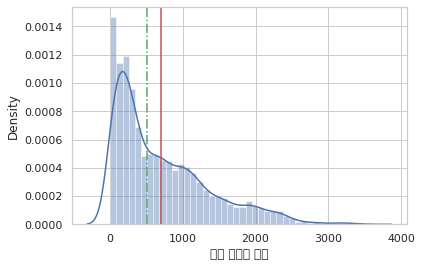

In [ ]:
sns.distplot(df1['빌린 자전거 갯수'])
sns.set(style='whitegrid')
plt.axvline(df1['빌린 자전거 갯수'].mean(), ls='-', color='r') #평균값
plt.axvline(df1['빌린 자전거 갯수'].median(), ls='-.', color='g') # 중앙값
plt.show()
# df1[df1['빌린 자전거 갯수'] > 0].hist(column='빌린 자전거 갯수')

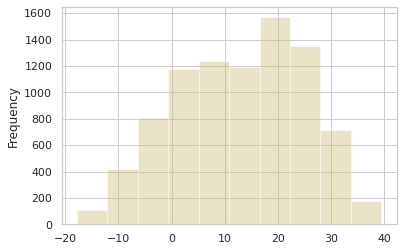

In [ ]:
df1['온도'].plot.hist(color = 'y',alpha=0.4,grid=True)

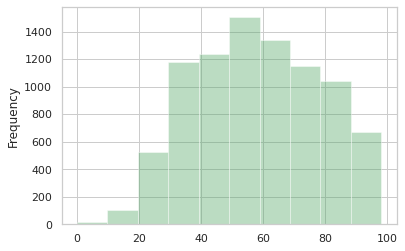

In [ ]:
df1['습도'].plot.hist(color = 'g',alpha=0.4,grid=True)

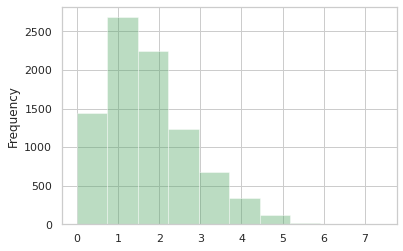

In [ ]:
df1['풍속'].plot.hist(color = 'g',alpha=0.4,grid=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

lrmodel = LinearRegression() # LinearRegression 모델을 초기화
lrmodel.fit(X_train, Y_train) # train_X와 train_Y 데이터로 모델을 학습

# 2.학습된 파라미터 값을 불러오기
beta_0 = lrmodel.intercept_ #
beta_1 = lrmodel.coef_[0] # 
beta_2 = lrmodel.coef_[1] #
beta_3 = lrmodel.coef_[2] 

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)


beta_0: 753.234097
beta_1: 31.708131
beta_2: -8.703278
beta_3: 32.158417


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn. model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

model = KNeighborsRegressor()

score = cross_val_score(model, X_train, Y_train, cv = 5)
print("교차검증 점수 :",score)

교차검증 점수 : [0.41003536 0.37897665 0.41436168 0.41092568 0.41225989]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df1[["온도", "습도","풍속"]]
Y = df1["빌린 자전거 갯수"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

model = KNeighborsClassifier()

mylist = list(range(1,50))
k_list = [x for x in mylist if x %2 !=0]

parameter_grid = {"n_neighbors" : k_list}


grid_search = GridSearchCV(model, parameter_grid, cv = 10 )
grid_search.fit(X_train, Y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]})

In [ ]:
grid_search = GridSearchCV(model, parameter_grid, cv = 10 )
grid_search.fit(X_train, Y_train)
grid_search.best_params_
grid_search.cv_results_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'mean_fit_time': array([0.00455904, 0.00473471, 0.00468051, 0.00486958, 0.00480392,
        0.00452528, 0.00477669, 0.00457628, 0.00451667, 0.00486116,
        0.00506568, 0.00435009, 0.00451598, 0.00494897, 0.0046041 ,
        0.00456057, 0.00497463, 0.004039  , 0.00454588, 0.00430093,
        0.00425768, 0.00443628, 0.00458925, 0.00424232, 0.0043164 ]),
 'std_fit_time': array([2.85415959e-04, 8.16250411e-04, 5.57860168e-04, 5.49598734e-04,
        6.38584975e-04, 2.82244063e-04, 4.18061067e-04, 3.27409360e-04,
        3.44646489e-04, 5.93615417e-04, 9.98928944e-04, 1.31176472e-04,
        2.71978740e-04, 1.01704645e-03, 5.13896179e-04, 4.40406980e-04,
        9.51590278e-04, 6.09583483e-05, 4.11954270e-04, 1.05243492e-04,
        1.97122169e-04, 2.89585987e-04, 5.31011274e-04, 1.34343536e-04,
        2.22493313e-04]),
 'mean_score_time': array([0.01355901, 0.01306031, 0.01454363, 0.015785  , 0.01451955,
        0.014663  , 0.0148397 , 0.0161303 , 0.01528239, 0.01584496,
        0.01

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=49)

In [ ]:

be = grid_search.best_estimator_
pred = be.predict (X_test) 
accuracy_score(Y_test, pred)

0.03729071537290715

In [ ]:
df1.dtypes

빌린 자전거 갯수            int64
시간                   int64
온도                 float64
습도                   int64
풍속                 float64
계절                  object
휴무                  object
Functioning Day     object
dtype: object